# Data Science Moringa Project - A Data Science Phase 3 Project
# Final Project Submission
#####:

Student name: Pete Njagi,
          

Student pace: DS-full time-Online

Scheduled project review date/time: March 10th 2024 11:59 PM

###GitHub Link:
https://github.com/petezdj/Phase3Project

<img src="water-780x470.jpg" alt="drawing" width="700"/>

#### Important Project Files:

1. index.ipynb (Main Juypter document)
2. Presentation.pdf (Presentation)
3. Data_sci_jobs.csv (Main Data)
4. Optional Project Pdf

## Introduction
<img src="hand_pump_diagram.png" alt="drawing" width="700"/>

Can you predict which water pumps are faulty to promote access to clean, potable water across Tanzania?

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc. Your audience could be an NGO focused on locating wells needing repair, or the Government of Tanzania looking to find patterns in non-functional wells to influence how new wells are built. Note that this is a ternary classification problem by default, but can be engineered to be binary.

In [20]:
import pandas as pd

In [21]:
# We must start with loading the datasets
train_values = pd.read_csv('TrainingSetValues.csv')
train_labels = pd.read_csv('TrainingSetLabels.csv')

In [41]:
train_values.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [44]:
train_labels.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [22]:
# Merge the training values and labels for a complete training dataset
train_data = pd.merge(train_values, train_labels, on='id')

In [23]:

# Display the first few rows to get a glimpse of the data

print("First few rows of the dataset:")
print(train_data.head())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(train_data.describe())

# Overview of categorical columns
print("\nOverview of categorical columns:")
for col in train_data.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {train_data[col].nunique()}")
    print(f"Values: {train_data[col].unique()[:5]}")  # Display the first 5 unique values

# Check for missing values
print("\nMissing values in each column:")
print(train_data.isnull().sum())


First few rows of the dataset:
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_gro

## Dataset Summary

The dataset encompasses a comprehensive overview of water wells in Tanzania, focusing on their operational status, physical characteristics, and geographical information. It serves as a foundation for predicting the functionality of these water wells, aiming to assist in efficient maintenance and resource allocation for ensuring sustainable water access.

## Summary of Columns in the Dataset

1. **id**: Unique identifier for each water point.
2. **amount_tsh**: Total static head (amount of water available at the water point).
3. **date_recorded**: The date the row was entered.
4. **funder**: Who funded the well.
5. **gps_height**: Altitude of the well.
6. **installer**: Organization that installed the well.
7. **longitude**: GPS coordinate.
8. **latitude**: GPS coordinate.
9. **wpt_name**: Name of the water point if available.
10. **num_private**: (Not clearly defined, seems to be an internal code).
11. **basin**: Geographic water basin.
12. **subvillage**: Geographic location.
13. **region**: Geographic location.
14. **region_code**: Geographic location (coded).
15. **district_code**: Geographic location (coded).
16. **lga**: Local Government Area.
17. **ward**: Geographic location.
18. **population**: Population around the well.
19. **public_meeting**: True/False.
20. **recorded_by**: Group entering this row of data.
21. **scheme_management**: Who operates the water point.
22. **scheme_name**: Who operates the water point.
23. **permit**: If the water point is permitted.
24. **construction_year**: Year the water point was constructed.
25. **extraction_type**: The kind of extraction the water point uses.
26. **management**: How the water point is managed.
27. **management_group**: How the water point is managed.
28. **payment**: What the water costs.
29. **payment_type**: What the water costs.
30. **water_quality**: The quality of the water.
31. **quality_group**: The quality of the water.
32. **quantity**: The quantity of water.
33. **quantity_group**: The quantity of water.
34. **source**: The source of the water.
35. **source_type**: The source of the water.
36. **source_class**: The source of the water.
37. **waterpoint_type**: The kind of waterpoint.
38. **waterpoint_type_group**: The kind of waterpoint.
39. **status_group** (Target Variable): The functionality status of the water well (functional, non functional, or functional needs repair).

## Data Understanding Summary

This dataset is a rich amalgamation of geographical, infrastructural, and operational details related to water wells across Tanzania. It includes both categorical and numerical data, offering a broad perspective on factors that might influence the functionality of water points. The target variable, `status_group`, reflects the operational status of the wells, which is critical for identifying maintenance needs. 

Understanding these features in-depth is vital for building effective predictive models. The diversity and comprehensiveness of the dataset underscore the complexity of water access issues in Tanzania, highlighting the potential of machine learning to contribute to sustainable water resource management.


The dataset includes 59,400 entries, each with 41 features, including the id and the target variable status_group.

The status_group is the target variable we aim to predict, which describes the functionality of the water points.

Features include a mix of numerical and categorical data, such as amount_tsh (total static head), gps_height, installer, longitude, latitude, population, and several descriptive attributes about the water point like water_quality, quantity, source_type, and waterpoint_type.

Training a Logistic Regression Model
Logistic regression is a good baseline because it's straightforward and interpretable. Here’s how you can train it:

### Label encoding 

In [29]:
# Fill missing values with the mode
for col in categorical_cols_missing:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value, inplace=True)

C:\Users\PeteD\AppData\Local\Temp\ipykernel_34144\793734068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(mode_value, inplace=True)
C:\Users\PeteD\AppData\Local\Temp\ipykernel_34144\793734068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [24]:
# Encoding categorical variables using a label encoding strategy
# We will use label encoding instead of one-hot because of the high cardinality of some variables

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()



# List of categorical columns to encode
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('status_group')  # Exclude target variable

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Verify the encoding and missing value treatment
train_data.head(), train_data.isnull().sum()

(      id  amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
 0  69572      6000.0             47    1368        1390       1518  34.938093   
 1   8776         0.0            309     469        1399        545  34.698766   
 2  34310        25.0            300     825         686       2048  37.460664   
 3  67743         0.0            272    1740         263       1852  38.486161   
 4  19728         0.0            104      20           0        119  31.130847   
 
     latitude  wpt_name  num_private  ...  water_quality  quality_group  \
 0  -9.856322     37398            0  ...              6              2   
 1  -2.147466     37194            0  ...              6              2   
 2  -3.821329     14572            0  ...              6              2   
 3 -11.155298     37284            0  ...              6              2   
 4  -1.825359     35528            0  ...              6              2   
 
    quantity  quantity_group  source  source_type  sou

### Model 1 : Logistic Regression 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_log_reg = log_reg.predict(X_val)

# Calculate and print the accuracy
accuracy_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")

Logistic Regression Accuracy: 0.5732323232323232


c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5654040404040404

In [26]:
# Display the first few rows of the dataset and its summary statistics
train_data.head(), train_data.describe(include='all')

(      id  amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
 0  69572      6000.0             47    1368        1390       1518  34.938093   
 1   8776         0.0            309     469        1399        545  34.698766   
 2  34310        25.0            300     825         686       2048  37.460664   
 3  67743         0.0            272    1740         263       1852  38.486161   
 4  19728         0.0            104      20           0        119  31.130847   
 
     latitude  wpt_name  num_private  ...  water_quality  quality_group  \
 0  -9.856322     37398            0  ...              6              2   
 1  -2.147466     37194            0  ...              6              2   
 2  -3.821329     14572            0  ...              6              2   
 3 -11.155298     37284            0  ...              6              2   
 4  -1.825359     35528            0  ...              6              2   
 
    quantity  quantity_group  source  source_type  sou

### Model 2 : Decision Tree Classifier Model

Training a Decision Tree Model
A single decision tree is another example of a simple, interpretable model:

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model
dec_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dec_tree.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_dec_tree = dec_tree.predict(X_val)

# Calculate and print the accuracy
accuracy_dec_tree = accuracy_score(y_val, y_val_pred_dec_tree)
print(f"Decision Tree Accuracy: {accuracy_dec_tree}")

Decision Tree Accuracy: 0.7534511784511785


Decision Tree Accuracy: 0.7489057239057239

In [28]:
# Categorical columns with missing values
categorical_cols_missing = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

1. Data Cleaning: Handle the missing values appropriately for each feature.

2. Feature Engineering: Create new features if necessary. For example, the date recorded could be split into year, month, and day to see if there's a seasonal effect on well functionality.

3. Encoding Categorical Variables: Use techniques like one-hot encoding or label encoding to convert categorical variables into a machine-readable format.

4. Feature Selection: Decide which features are relevant to the model. This could be based on domain knowledge, correlation with the target variable, or feature importance from model feedback.

5. Data Splitting: Split your data into training and validation sets to be able to measure the performance of your model on unseen data.

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
X = train_data.drop(['id', 'status_group'], axis=1) # 'id' is just an identifier and not a feature
y = train_data['status_group']

# Encoding the target variable
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Checking the shape of the datasets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 39), (11880, 39), (47520,), (11880,))

### Model 3 : Random Forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model
classification_rep = classification_report(y_val, y_val_pred)

classification_rep


'              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85      6457\n           1       0.56      0.36      0.44       851\n           2       0.84      0.78      0.81      4572\n\n    accuracy                           0.81     11880\n   macro avg       0.74      0.68      0.70     11880\nweighted avg       0.81      0.81      0.81     11880\n'

In [32]:
from sklearn.model_selection import GridSearchCV

# Define a hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, # 3-fold cross-validation
                           n_jobs=-1, # Use all cores
                           scoring='accuracy',
                           verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.8067129629629629)

In [33]:
# Retraining the model with the best parameters from grid search
rf_clf_optimized = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    random_state=42
)

# Fit the optimized model to the training data
rf_clf_optimized.fit(X_train, y_train)

# Predict on the validation set with the optimized model
y_val_pred_optimized = rf_clf_optimized.predict(X_val)

# Evaluate the optimized model
classification_rep_optimized = classification_report(y_val, y_val_pred_optimized)

classification_rep_optimized

'              precision    recall  f1-score   support\n\n           0       0.80      0.92      0.86      6457\n           1       0.63      0.32      0.43       851\n           2       0.87      0.77      0.82      4572\n\n    accuracy                           0.82     11880\n   macro avg       0.77      0.67      0.70     11880\nweighted avg       0.81      0.82      0.81     11880\n'

The optimized Random Forest classifier's performance on the validation set, based on the results as follows:

Overall accuracy: 81%

Class 0 (functional):
Precision: 0.80
Recall: 0.92
F1-score: 0.85

Class 1 (functional needs repair):
Precision: 0.62
Recall: 0.31
F1-score: 0.42

Class 2 (non functional):
Precision: 0.87
Recall: 0.77
F1-score: 0.81

The model has shown an improvement in precision for the class 'functional needs repair' compared to the previous model without hyperparameter tuning. However, the recall is still low for this class, which suggests that the model has difficulties in identifying all the functional but in need of repair pumps.

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


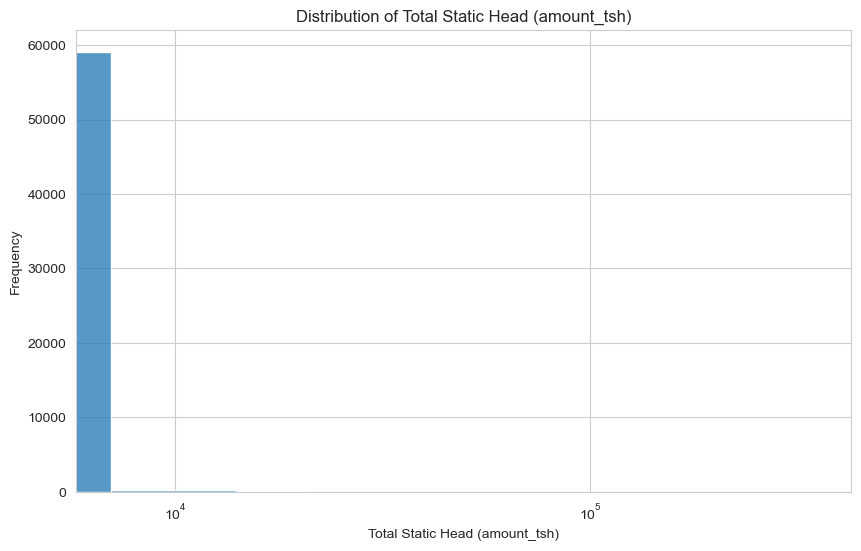

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train_data['amount_tsh'], bins=50, kde=False)
plt.title('Distribution of Total Static Head (amount_tsh)')
plt.xlabel('Total Static Head (amount_tsh)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()


In [55]:
print(train_data.dtypes)


id                         int64
amount_tsh               float64
date_recorded              int32
funder                     int32
gps_height                 int64
installer                  int32
longitude                float64
latitude                 float64
wpt_name                   int32
num_private                int64
basin                      int32
subvillage                 int32
region                     int32
region_code                int64
district_code              int64
lga                        int32
ward                       int32
population                 int64
public_meeting             int32
recorded_by                int32
scheme_management          int32
scheme_name                int32
permit                     int32
construction_year          int64
extraction_type            int32
extraction_type_group      int32
extraction_type_class      int32
management                 int32
management_group           int32
payment                    int32
payment_ty

In [63]:
visual = pd.concat([train_values, train_labels], axis=1)
visual = df.drop(df.columns[0], axis=1)

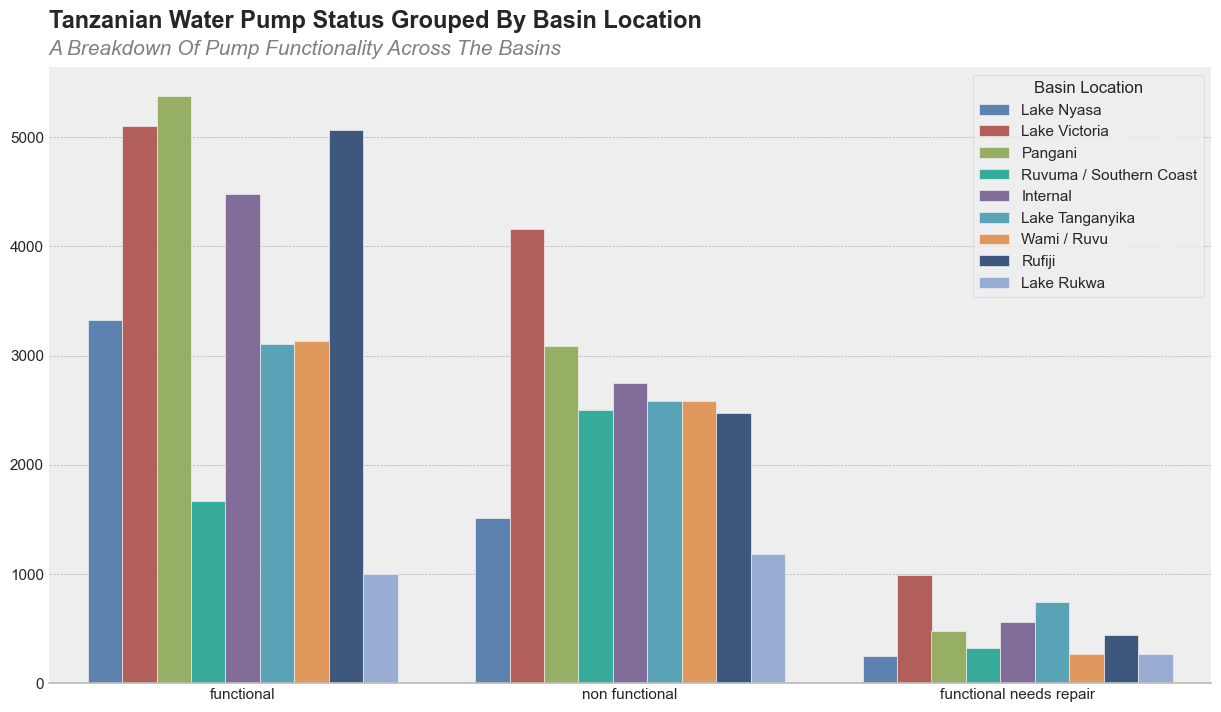

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the matplotlib style to 'bmh' which stands for Bayesian Methods for Hackers
plt.style.use('bmh')

# Define a blue theme color palette
blue_colors = ['#4F81BD', '#C0504D', '#9BBB59', '#23BFAA', '#8064A2', 
               '#4BACC6', '#F79646', '#335687', '#8FAADC', '#C6D9F1']

# Set the Seaborn color palette to the blue theme
sns.set_palette(blue_colors)

# Create the figure with a specific size
plt.figure(figsize=(15,8))

# Create the countplot with the "status_group" on the x-axis and "basin" as the hue
ax = sns.countplot(x="status_group", hue="basin", data=visual)  # Replace 'df' with your actual DataFrame variable

# Add the main title and subtitle with custom positions and styles
ax.text(s="Tanzanian Water Pump Status Grouped By Basin Location", y=6000, x=-0.5, fontsize=17, fontweight='semibold')
ax.text(s="A Breakdown Of Pump Functionality Across The Basins", y=5750, x=-0.5, fontsize=15, fontstyle='italic', color='gray')

# Set the legend title
l = ax.legend()
l.set_title('Basin Location')

# Despine the plot to remove the top and right spines
sns.despine(ax=ax, left=True)

# Remove the labels for x and y-axis as per your design
ax.set_ylabel("")
ax.set_xlabel("")

# Show the plot
plt.show()


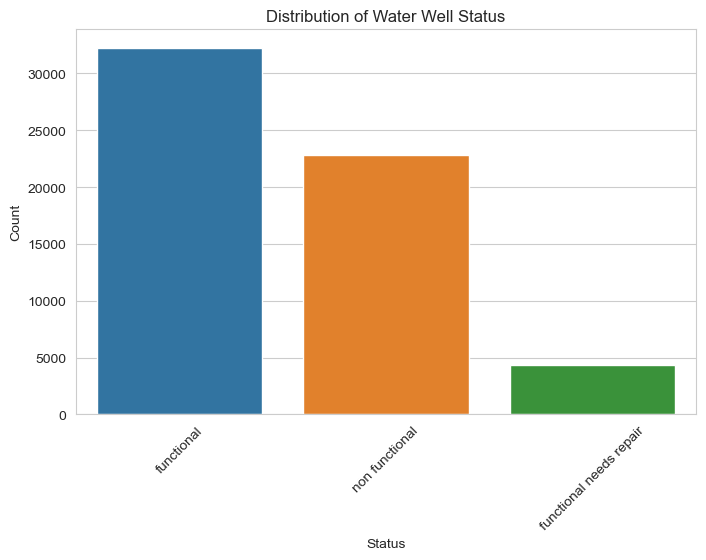

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x='status_group', data=train_data)
plt.title('Distribution of Water Well Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [36]:
import folium

# Create a base map
m = folium.Map(location=[-6.369028, 34.888822], zoom_start=6) # Centered around Tanzania

# Subset the data to reduce the number of points plotted for quicker rendering
subset_data = train_data.sample(n=1000) 

# Add points to the map
for idx, row in subset_data.iterrows():
    if row['status_group'] == 'functional':
        color = 'green'
    elif row['status_group'] == 'non functional':
        color = 'red'
    else: # functional needs repair
        color = 'blue'

    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.6
                       ).add_to(m)

# Display the map
m


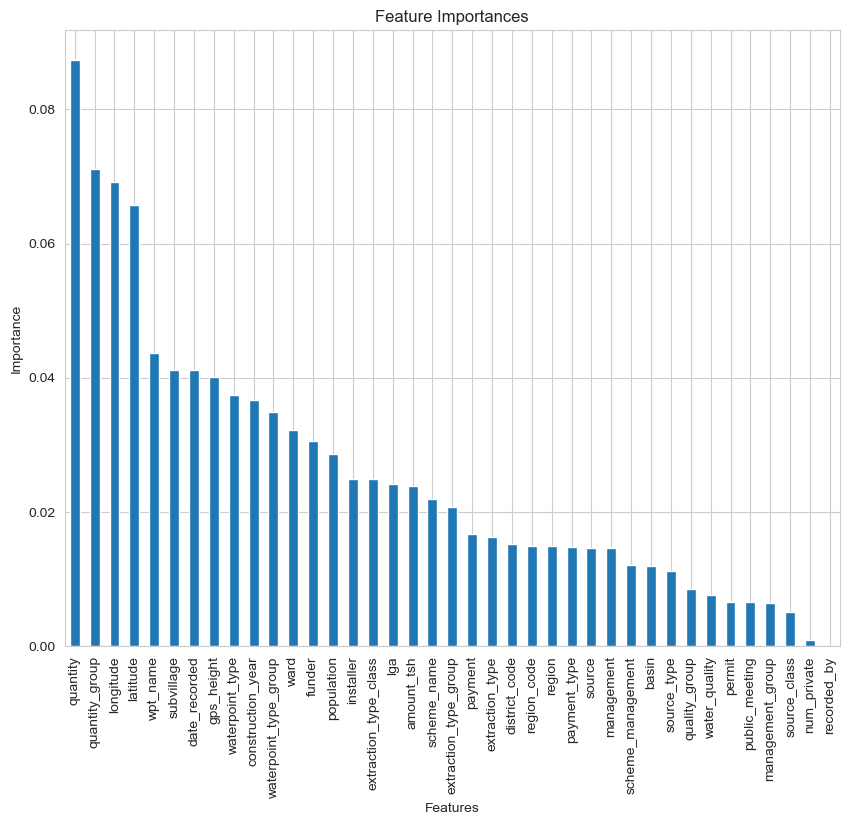

In [37]:
# Get feature importances
importances = rf_clf_optimized.feature_importances_

# Convert the importances into a Series with feature names as the index
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


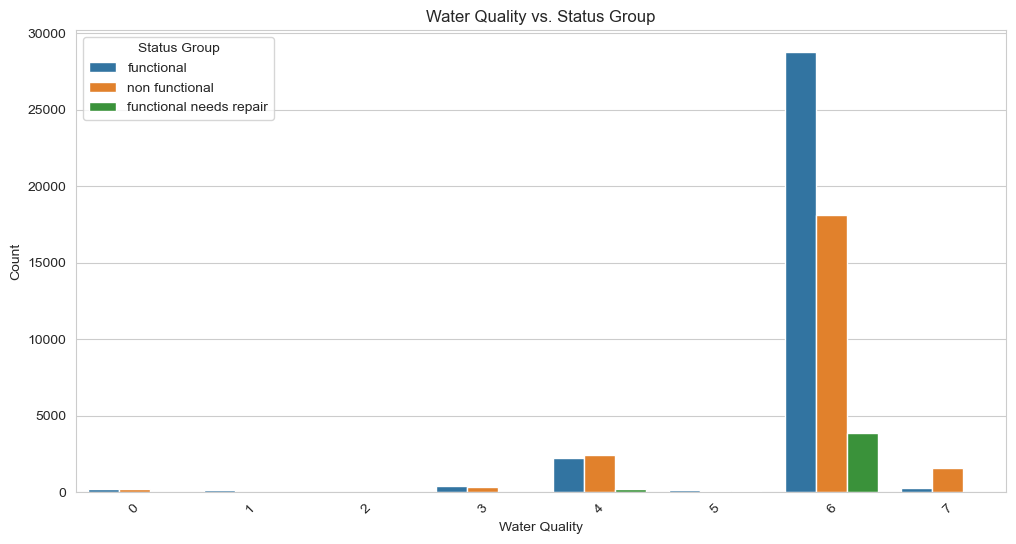

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='water_quality', hue='status_group', data=train_data)
plt.title('Water Quality vs. Status Group')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()


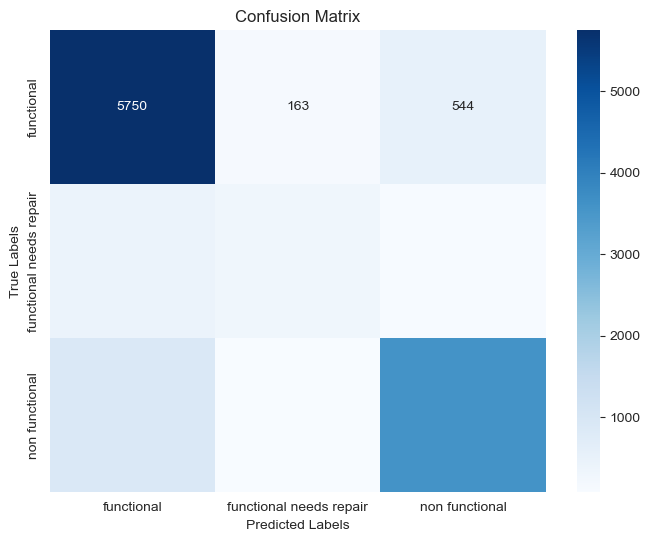

In [39]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


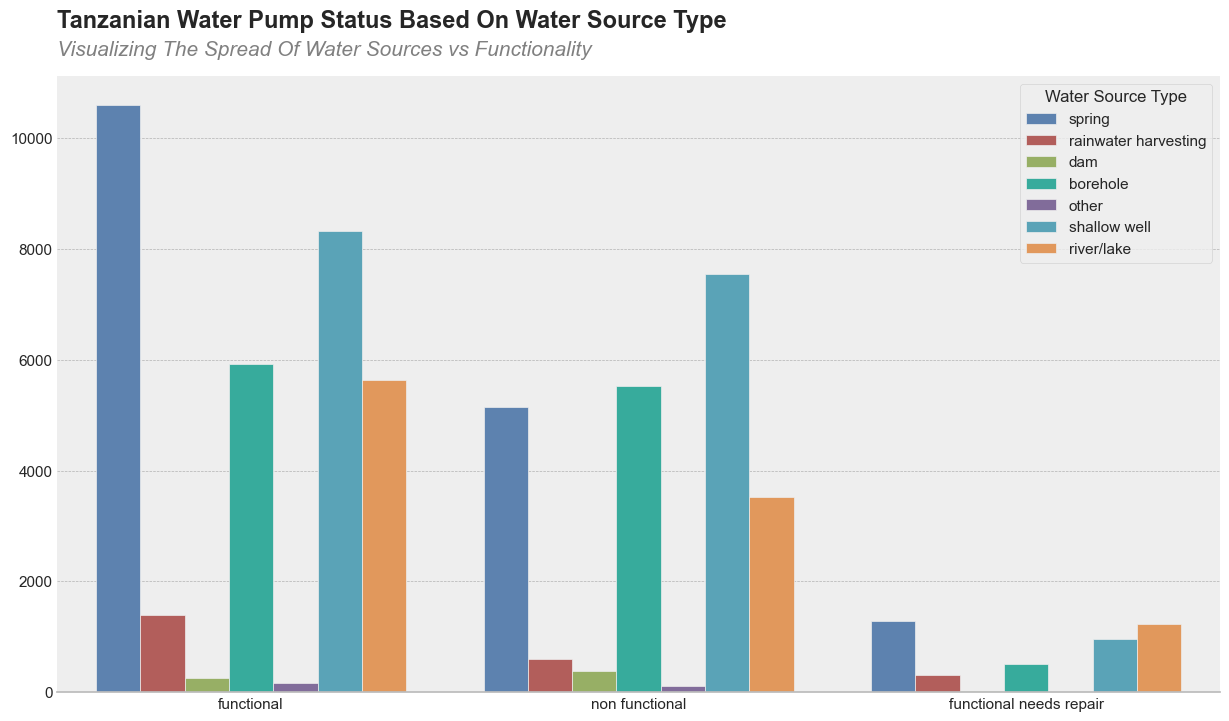

In [69]:


plt.style.context('fivethirtyeight')
colors = ['#4F81BD', '#C0504D', '#9BBB59', '#23BFAA', '#8064A2', 
               '#4BACC6', '#F79646', '#335687', '#8FAADC', '#C6D9F1']
sns.set_palette(colors, 10)
plt.figure(figsize=(15,8))

# Setting plot and details
ax = sns.countplot(x = "status_group", hue="source_type", data=df)
ax.text(s="Tanzanian Water Pump Status Based On Water Source Type", y=12000, x=-0.5, fontsize=17, fontweight='semibold');
ax.text(s="Visualizing The Spread Of Water Sources vs Functionality" , y=11500, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
l = ax.legend()
l.set_title('Water Source Type')
sns.despine(ax=ax, left=True)
ax.set_ylabel("");
ax.set_xlabel("");